In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import torch as t
from gninvert.gns import MultiDiffusionGN
from gninvert.gnns import LinearGNN
from gninvert.hyperparamsearch import hpsearch
from gninvert.graph_compare import model_steps_compare
import matplotlib.pyplot as plt

In [45]:
diffusionGN = MultiDiffusionGN([0.1, 0.1])

In [46]:
device = t.device('cuda' if t.cuda.is_available() else 'cpu')

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

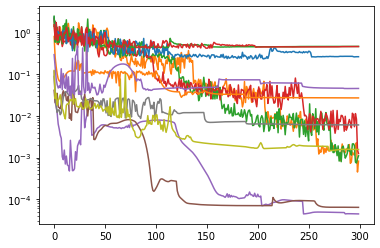

In [47]:
params = {
    'starting_lr': [0.05],
    'lr_scheduler_dec_factor': [0.2],
    'lr_scheduler_patience': [20],
    'lr_scheduler_cooldown': [20],
    'batch_size': [1],
    'adam_weight_decay': [5e-7],
    'epochs': [300],
    'loss_func': [t.nn.MSELoss(), t.nn.L1Loss()],
    'regularization_coefficient': [1e-5, 1e-4, 1e-3],
    'regularization_norm': [0.5, 1, 2]
}

results2 = hpsearch(
    params,
    model_constructor = lambda : LinearGNN(2).to(device),
    model_score_fn = lambda model : model_steps_compare(model, diffusionGN)['absolute']['avg_difs'][-1]
)

plots2 = [res['val_loss_history'] for res in results2]
for p in plots2:
    plt.plot(p)
plt.yscale('log')

In [50]:
[results[i]['settings'] for i in range(2)]

[{'starting_lr': 0.05,
  'lr_scheduler_dec_factor': 0.2,
  'lr_scheduler_patience': 20,
  'lr_scheduler_cooldown': 20,
  'batch_size': 1,
  'adam_weight_decay': 5e-07,
  'epochs': 300,
  'loss_func': MSELoss(),
  'regularization_coefficient': 1e-07,
  'regularization_norm': 2},
 {'starting_lr': 0.05,
  'lr_scheduler_dec_factor': 0.2,
  'lr_scheduler_patience': 20,
  'lr_scheduler_cooldown': 20,
  'batch_size': 1,
  'adam_weight_decay': 5e-07,
  'epochs': 300,
  'loss_func': MSELoss(),
  'regularization_coefficient': 1e-07,
  'regularization_norm': 1}]

In [51]:
list(results[0]['model'].parameters())

[Parameter containing:
 tensor([[-0.3146,  0.0270,  0.3154, -0.0268],
         [ 0.0188, -0.3391, -0.0186,  0.3397]], requires_grad=True),
 Parameter containing:
 tensor([-0.0005, -0.0004], requires_grad=True),
 Parameter containing:
 tensor([[ 9.9942e-01, -2.0976e-05,  3.1836e-01,  2.5339e-02],
         [-5.1949e-05,  9.9955e-01,  1.7574e-02,  2.9560e-01]],
        requires_grad=True),
 Parameter containing:
 tensor([0.0003, 0.0003], requires_grad=True)]

In [53]:
t.save(results[0]['model'], 'models/sim2-L2.pt')

In [17]:
params = {
    'starting_lr': [0.05],
    'lr_scheduler_dec_factor': [0.2],
    'lr_scheduler_patience': [20],
    'lr_scheduler_cooldown': [20],
    'batch_size': [1],
    'adam_weight_decay': [5e-7],
    'epochs': [300],
    'loss_func': [t.nn.MSELoss()],
    'regularization_coefficient': [1e-7, 1e-5, 1e-3, 1e-1],
    'regularization_norm': [1, 2]
}

In [19]:
results = hpsearch(
    params,
    model_constructor = lambda : LinearGNN(2).to(device),
    model_score_fn = lambda model : model_steps_compare(model, diffusionGN)['absolute']['avg_difs'][-1]
)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

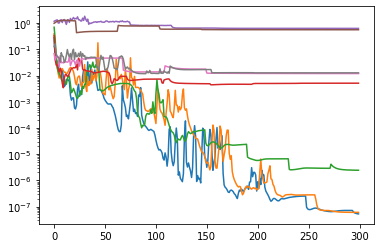

In [20]:
plots = [res['val_loss_history'] for res in results]
for p in plots:
    plt.plot(p)
plt.yscale('log')

In [22]:
[(results[i]['settings'],) for i in range(3)]

[({'starting_lr': 0.05,
   'lr_scheduler_dec_factor': 0.2,
   'lr_scheduler_patience': 20,
   'lr_scheduler_cooldown': 20,
   'batch_size': 1,
   'adam_weight_decay': 5e-07,
   'epochs': 300,
   'loss_func': MSELoss(),
   'regularization_coefficient': 1e-07,
   'regularization_norm': 2},),
 ({'starting_lr': 0.05,
   'lr_scheduler_dec_factor': 0.2,
   'lr_scheduler_patience': 20,
   'lr_scheduler_cooldown': 20,
   'batch_size': 1,
   'adam_weight_decay': 5e-07,
   'epochs': 300,
   'loss_func': MSELoss(),
   'regularization_coefficient': 1e-07,
   'regularization_norm': 1},),
 ({'starting_lr': 0.05,
   'lr_scheduler_dec_factor': 0.2,
   'lr_scheduler_patience': 20,
   'lr_scheduler_cooldown': 20,
   'batch_size': 1,
   'adam_weight_decay': 5e-07,
   'epochs': 300,
   'loss_func': MSELoss(),
   'regularization_coefficient': 1e-05,
   'regularization_norm': 2},)]

In [23]:
[(results[i]['score'], results[i]['val_loss_history'][-1]) for i in range(len(results))]

[(0.00045201927423477173, 5.246272749559466e-08),
 (0.000646372907795012, 6.019409681812249e-08),
 (0.0037178099155426025, 2.4325445338035934e-06),
 (0.10251538455486298, 0.005116369109600782),
 (0.12995238602161407, 0.6315050721168518),
 (0.15728004276752472, 0.5598198771476746),
 (0.18104438483715057, 0.011923183687031269),
 (0.19624969363212585, 0.01269106101244688)]

In [28]:
list(results[0]['model'].parameters())

[Parameter containing:
 tensor([[-0.3146,  0.0270,  0.3154, -0.0268],
         [ 0.0188, -0.3391, -0.0186,  0.3397]], requires_grad=True),
 Parameter containing:
 tensor([-0.0005, -0.0004], requires_grad=True),
 Parameter containing:
 tensor([[ 9.9942e-01, -2.0976e-05,  3.1836e-01,  2.5339e-02],
         [-5.1949e-05,  9.9955e-01,  1.7574e-02,  2.9560e-01]],
        requires_grad=True),
 Parameter containing:
 tensor([0.0003, 0.0003], requires_grad=True)]

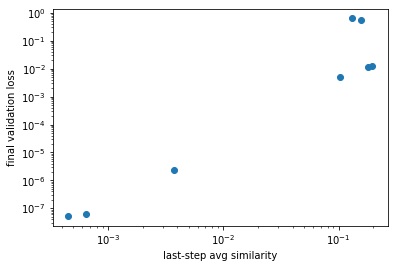

In [24]:
plt.scatter([result['score'] for result in results],
            [result['val_loss_history'][-1] for result in results])

plt.xlabel('last-step avg similarity')
plt.ylabel('final validation loss')

plt.yscale('log')
plt.xscale('log')

In [31]:
t.save(results[0]['model'], "models/sim2-hpmodel1.pt")

# Stability check

In [32]:
params_stability = {
    'starting_lr': [0.01, 0.01, 0.01, 0.01],
    'lr_scheduler_dec_factor': [0.2],
    'lr_scheduler_patience': [20],
    'lr_scheduler_cooldown': [20],
    'batch_size': [1],
    'adam_weight_decay': [5e-7],
    'epochs': [600],
    'loss_func': [t.nn.MSELoss()]
}

In [33]:
sresults = hpsearch(
    params_stability,
    lambda : LinearGNN(2).to(device),
    lambda model : model_steps_compare(model, diffusionGN)['absolute']['avg_difs'][-1]
)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

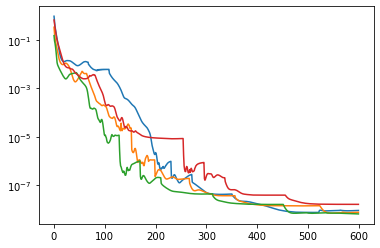

In [34]:
plots = [res['val_loss_history'] for res in sresults]
for p in plots:
    plt.plot(p)
plt.yscale('log')

In [38]:
t.save(sresults[0]['model'], 'models/sim2-hpmodel2.pt')

## Above: some idea of extent of randomness-induced instability in training with same hyperparams

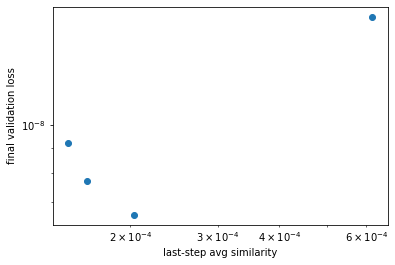

In [35]:
plt.scatter([result['score'] for result in sresults],
            [result['val_loss_history'][-1] for result in sresults])

plt.xlabel('last-step avg similarity')
plt.ylabel('final validation loss')

plt.yscale('log')
plt.xscale('log')